In [1]:
from hyper import *
from alignment import *
from datasets.preprecossing import *
from core import *
from datasets.loading import *
from datasets.hc_dataset import *
from datasets.balance_dataset import *
from utils.linkage import *
from model.balancehc import balancehc

from utils.poincare import *
import scib
import shutil



In [2]:
cell_path1 = './datas/111/CHOL_GSE142784.h5ad'
folder_path1 = './datas/319/'
radius1 = 0
c1 =0
epoches1 =  50
epoches2 =  10
contin = False
resolution=2
method='average'
alignment=1
n_pca=50
meta_col = 'Celltype..major.lineage.'
mst = False


In [3]:
adata1 = sc.read_h5ad('./datas/miss/1/'+"save.h5ad")
adata1

AnnData object with n_obs × n_vars = 2452 × 636
    obs: 'celltype', 'celltype1', 'leiden'
    var: 'n_cells'

In [4]:
datas =sc.read_h5ad('./datas/111/BRCA_GSE110686.h5ad')
datas

/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/orig.ident' was written without encoding metadata.
  return read_elem(dataset)
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/nCount_RNA' was written without encoding metadata.
  return read_elem(dataset)
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/nFeature_RNA' was written without encoding metadata.
  return read_elem(dataset)
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/UMAP_1' was written without encoding metadata.
  return read_elem(dataset)
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/UMAP_2' was written without encoding metadata.
  return 

AnnData object with n_obs × n_vars = 6035 × 12750
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'UMAP_1', 'UMAP_2', 'Celltype..malignancy.', 'Celltype..major.lineage.', 'Celltype..minor.lineage.', 'Cluster', 'Patient', 'Source', 'Gender', 'Stage'
    var: 'features'

In [5]:
adata = datas[adata1.obs.index.tolist(),[ i for i in adata1.var.index if i in datas.var.index]]

In [6]:
[ i for i in adata1.var.index if i in datas.var.index]

['GZMK',
 'TMSB4X',
 'CCL5',
 'RPS27',
 'MALAT1',
 'RPL10',
 'RPL41',
 'GZMA',
 'RPS14',
 'RPS18',
 'CXCR4',
 'RPL23A',
 'RPS29',
 'RPS2',
 'RPL13A',
 'RPL3',
 'RPS3',
 'RPL27A',
 'ANXA1',
 'RPL34',
 'RPS15',
 'ZFP36L2',
 'RPLP2',
 'RPL13',
 'RPS15A',
 'LYAR',
 'CD69',
 'DUSP2',
 'RPL7',
 'RPS27A',
 'FOS',
 'RPS25',
 'RPL32',
 'RPS28',
 'RPS6',
 'RPL31',
 'DUSP1',
 'BTG1',
 'NKG7',
 'RPL18A',
 'GIMAP4',
 'KLRG1',
 'CD52',
 'JUNB',
 'RPS12',
 'RPL39',
 'RPL28',
 'GIMAP7',
 'EIF1',
 'HCST',
 'MT-CO3',
 'ITM2C',
 'RGCC',
 'TC2N',
 'TRAT1',
 'RPL35A',
 'TRGC2',
 'GZMM',
 'CLEC2B',
 'MT-CYB',
 'TXNIP',
 'H3F3B',
 'CD8B',
 'JUN',
 'RPL30',
 'DNAJB1',
 'CST7',
 'ZFP36',
 'IER2',
 'STK17A',
 'SAMD3',
 'EOMES',
 'CTSW',
 'RPL14',
 'PLAC8',
 'KLRD1',
 'GPR183',
 'TSC22D3',
 'MT-ND4',
 'LINC00861',
 'ATM',
 'IL7R',
 'RPL10A',
 'CD44',
 'FOSB',
 'PIK3R1',
 'KLF6',
 'PDE4B',
 'HLA-E',
 'RARRES3',
 'PPP2R5C',
 'CCDC109B',
 'CCR7',
 'PDCD4',
 'BTG2',
 'CD8A',
 'SARAF',
 'CMC1',
 'MT-ND2',
 'PABPC1',


In [7]:
adata1.var.index

Index(['GZMK', 'TMSB4X', 'CCL5', 'RPS27', 'MALAT1', 'RPL10', 'RPL41', 'GZMA',
       'RPS14', 'RPS18',
       ...
       'COPZ1', 'ARPC4', 'NOP10', 'UBE2D2', 'NDUFA1', 'EDF1', 'ATP5C1',
       'C12orf57', 'ISCU', 'COX8A'],
      dtype='object', length=636)

In [8]:
adata1.obs

,celltype,celltype1,leiden
,,,
CTCCTAGTCTGGCGTG-2,Tfh,CD4Tconv,6
TGTATTCTCCCATTTA-2,Th2,CD4Tconv,28
GACCTGGAGTAATCCC-3,Th17,CD4Tconv,13
ATCTGCCAGTGTCCAT-3,CD4Tn,CD4Tconv,31
GGGAGATAGGCATGGT-2,CD4Tn,CD4Tconv,43
...,...,...,...
ACGGAGAAGAAGGCCT-1,CD4Tn,CD4Tconv,7
CGATCGGTCATCTGTT-1,Th17,CD4Tconv,5
AACTCTTAGCCACCTG-3,Th17,CD4Tconv,13


In [9]:
adata

View of AnnData object with n_obs × n_vars = 2452 × 627
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'UMAP_1', 'UMAP_2', 'Celltype..malignancy.', 'Celltype..major.lineage.', 'Celltype..minor.lineage.', 'Cluster', 'Patient', 'Source', 'Gender', 'Stage'
    var: 'features'

In [10]:
adata

View of AnnData object with n_obs × n_vars = 2452 × 627
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'UMAP_1', 'UMAP_2', 'Celltype..malignancy.', 'Celltype..major.lineage.', 'Celltype..minor.lineage.', 'Cluster', 'Patient', 'Source', 'Gender', 'Stage'
    var: 'features'

In [11]:
adata.to_df()

,GZMK,TMSB4X,CCL5,RPS27,MALAT1,RPL10,RPL41,GZMA,RPS14,RPS18,...,COPZ1,ARPC4,NOP10,UBE2D2,NDUFA1,EDF1,ATP5C1,C12orf57,ISCU,COX8A
CTCCTAGTCTGGCGTG-2,0.000000,6.141558,0.000000,4.521100,6.443277,4.121058,4.300672,0.000000,3.838771,4.121058,...,0.000000,1.394069,0.000000,0.000000,2.311908,2.311908,2.311908,0.000000,1.954791,1.954791
TGTATTCTCCCATTTA-2,3.696171,5.711236,3.027539,4.529185,6.942841,4.197020,4.721436,2.021387,4.721436,4.597459,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GACCTGGAGTAATCCC-3,0.000000,5.198000,4.510365,3.583033,6.814044,3.713084,3.931335,3.044046,3.583033,3.433503,...,0.000000,0.000000,0.000000,1.791343,0.000000,1.791343,0.000000,0.000000,1.791343,2.397441
ATCTGCCAGTGTCCAT-3,0.000000,5.483167,0.000000,5.224442,6.529682,4.829385,4.998756,0.000000,4.252545,4.331493,...,0.000000,0.000000,1.357595,0.000000,0.000000,1.357595,1.357595,0.000000,1.913043,0.000000
GGGAGATAGGCATGGT-2,0.000000,5.701265,2.920139,5.068242,7.114013,4.485477,5.068242,0.000000,4.381369,4.665919,...,0.000000,0.000000,2.279514,2.279514,2.279514,0.000000,0.000000,0.000000,0.000000,2.279514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACGGAGAAGAAGGCCT-1,0.000000,6.053254,0.000000,4.515970,6.875535,3.755455,4.153092,3.085428,4.436838,4.838351,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CGATCGGTCATCTGTT-1,0.000000,5.693110,3.119940,2.736315,6.677903,3.790760,3.790760,2.736315,3.612944,3.790760,...,2.736315,2.105963,2.105963,2.105963,2.736315,0.000000,2.105963,2.736315,2.105963,0.000000
AACTCTTAGCCACCTG-3,0.000000,5.482457,0.000000,4.701888,6.926190,4.527741,4.565082,2.923465,3.682167,4.362650,...,0.000000,0.000000,1.508761,0.000000,0.000000,1.508761,0.000000,1.508761,1.508761,1.508761
GGGAGATGTAGTGAAT-1,0.000000,5.707110,0.000000,4.017202,7.444302,4.780650,4.520800,3.620698,3.838474,4.416647,...,2.311635,2.311635,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [12]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, exclude_highly_expressed=True)
sc.pp.log1p(adata)
adata

/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/Users/dongjiajie/opt/anaconda3/lib/python3.8/contextlib.py:120: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


AnnData object with n_obs × n_vars = 1803 × 627
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'UMAP_1', 'UMAP_2', 'Celltype..malignancy.', 'Celltype..major.lineage.', 'Celltype..minor.lineage.', 'Cluster', 'Patient', 'Source', 'Gender', 'Stage', 'n_genes'
    var: 'features', 'n_cells'
    uns: 'log1p'

In [13]:
sc.pp.highly_variable_genes(
    adata,
    min_mean=0.0125,
    max_mean=3,
    min_disp=0.5,
    n_top_genes=2000
)
adata.raw = adata
adata._inplace_subset_var(adata.var['highly_variable'])
adata.to_df()

,GZMK,TMSB4X,CCL5,RPS27,MALAT1,RPL10,RPL41,GZMA,RPS14,RPS18,...,COPZ1,ARPC4,NOP10,UBE2D2,NDUFA1,EDF1,ATP5C1,C12orf57,ISCU,COX8A
CTCCTAGTCTGGCGTG-2,0.000000,1.921308,0.000000,1.666132,1.962387,1.591665,1.625788,0.000000,1.535567,1.591665,...,0.000000,0.842998,0.000000,0.000000,1.161456,1.161456,1.161456,0.000000,1.049278,1.049278
GACCTGGAGTAATCCC-3,0.000000,1.840963,1.722969,1.537971,2.073319,1.566072,1.611526,1.412280,1.537971,1.504655,...,0.000000,0.000000,0.000000,1.039355,0.000000,1.039355,0.000000,0.000000,1.039355,1.237123
ATCTGCCAGTGTCCAT-3,0.000000,1.926578,0.000000,1.885430,2.077634,1.819139,1.848099,0.000000,1.713696,1.728801,...,0.000000,0.000000,0.897057,0.000000,0.000000,0.897057,0.897057,0.000000,1.114027,0.000000
GTCCTCAAGTGCCATT-2,0.000000,1.886820,0.000000,1.505638,2.003457,1.402717,1.546978,0.000000,1.337273,1.428529,...,1.053973,0.849874,0.849874,0.849874,1.053973,1.053973,0.000000,0.000000,1.053973,1.164785
CTGCCTATCGACGGAA-2,1.500692,1.840829,0.000000,1.712664,2.012981,1.759788,1.752875,1.187163,1.693138,1.824428,...,0.000000,0.982330,0.000000,0.982330,0.982330,0.982330,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCCAGTTGTTGCCTCT-1,0.000000,1.839163,0.000000,1.425017,1.967950,1.570438,1.555748,0.000000,1.347443,1.596426,...,0.000000,1.110478,0.907109,0.000000,1.110478,0.907109,0.000000,0.000000,0.000000,0.907109
TCGTACCTCCGGGTGT-2,1.063754,1.878248,1.269226,1.760878,2.216599,1.771520,1.760878,1.504371,1.634852,1.815990,...,0.000000,0.000000,1.063754,0.000000,0.000000,1.063754,0.000000,0.000000,0.000000,0.000000
CGATCGGTCATCTGTT-1,0.000000,1.984022,1.490012,1.389917,2.123082,1.644066,1.644066,1.389917,1.605485,1.644066,...,1.389917,1.199988,1.199988,1.199988,1.389917,0.000000,1.199988,1.389917,1.199988,0.000000
AACTCTTAGCCACCTG-3,0.000000,1.838000,0.000000,1.710487,2.038023,1.679675,1.686362,1.339627,1.514875,1.649562,...,0.000000,0.000000,0.897775,0.000000,0.000000,0.897775,0.000000,0.897775,0.897775,0.897775


In [14]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,UMAP_1,UMAP_2,Celltype..malignancy.,Celltype..major.lineage.,Celltype..minor.lineage.,Cluster,Patient,Source,Gender,Stage,n_genes
CTCCTAGTCTGGCGTG-2,0,2409.541365,1405,2.992545,3.168246,Immune cells,CD4Tconv,Tfh,10,BRCA,Tumor,Female,Primary,306
GACCTGGAGTAATCCC-3,0,2226.756313,1101,3.686147,-1.859115,Immune cells,CD4Tconv,Th17,6,BRCA,Tumor,Female,Primary,263
ATCTGCCAGTGTCCAT-3,0,1857.854626,1074,-3.040782,0.519949,Immune cells,CD4Tconv,CD4Tn,0,BRCA,Tumor,Female,Primary,244
GTCCTCAAGTGCCATT-2,0,2440.234683,1427,1.320840,5.552480,Immune cells,CD4Tconv,Tfh,5,BRCA,Tumor,Female,Primary,325
CTGCCTATCGACGGAA-2,0,1913.285794,970,-4.121430,-1.908579,Immune cells,CD4Tconv,CD4Tn,0,BRCA,Tumor,Female,Primary,241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCCAGTTGTTGCCTCT-1,0,2472.163358,1366,3.413327,5.009843,Immune cells,CD4Tconv,Tfh,5,BRCA,Tumor,Female,Primary,301
TCGTACCTCCGGGTGT-2,0,1691.378687,819,-6.709521,-1.649546,Immune cells,CD4Tconv,Th2,7,BRCA,Tumor,Female,Primary,219
CGATCGGTCATCTGTT-1,0,1859.160207,795,3.785981,0.446794,Immune cells,CD4Tconv,Th17,6,BRCA,Tumor,Female,Primary,223
AACTCTTAGCCACCTG-3,0,2109.047983,1141,1.876789,-0.730666,Immune cells,CD4Tconv,Th17,6,BRCA,Tumor,Female,Primary,278


In [15]:
resolution = 10
n_pca = 10
preprocessing_cluster(adata,N_pcs=n_pca,resolution=resolution)

inter_gene = sort_data(adata,adata)

tmp1 = calculate_cluster_centroid_for_genes(adata,inter_gene,folder_path1)
meta_list1 = calculate_cluster_celltype(adata,meta_col='Celltype..minor.lineage.');
tmp1.shape

2024-03-19 17:33:43.199672: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(80, 10)

In [16]:
len(meta_list1)

80

In [17]:
tmp1.shape

(80, 10)

In [18]:
data_path = folder_path1 + 'datas.data'

In [22]:
if(0):
    print(1)
else:
    print(0)

0


In [27]:
np.random.seed(1234)
torch.manual_seed(1234)
x, y_true, similarities = load_data(data_path,1,tmp1.shape[1]+1,0)
print("{} length:{}".format(data_path,len(y_true)));
dataset = HCDataset(x, y_true, similarities, num_samples=50000)
dataloader = data.DataLoader(dataset, batch_size=32, shuffle=True, pin_memory=True)
model = HypHC(dataset.n_nodes, 2, 5e-2, 5e-2 ,0.999)

# model.to("cpu")
Optimizer = getattr(optim, 'RAdam')
optimizer = Optimizer(model.parameters(),0.0005)
train(model,dataloader,optimizer,similarities,40);


./datas/319/datas.data length:80
Generating all pairs superset
	 Epoch 0 | average train loss: 0.947821
Optimization finished.
	 Epoch 1 | average train loss: 0.925155
Optimization finished.
	 Epoch 2 | average train loss: 0.919993
Optimization finished.
	 Epoch 3 | average train loss: 0.918214
Optimization finished.
	 Epoch 4 | average train loss: 0.917309
Optimization finished.
	 Epoch 5 | average train loss: 0.917184
Optimization finished.
	 Epoch 6 | average train loss: 0.917575
Optimization finished.
	 Epoch 7 | average train loss: 0.917258
Optimization finished.
	 Epoch 8 | average train loss: 0.917036
Optimization finished.
	 Epoch 9 | average train loss: 0.917607
Optimization finished.
	 Epoch 10 | average train loss: 0.917493
Optimization finished.
	 Epoch 11 | average train loss: 0.917337
Optimization finished.
	 Epoch 12 | average train loss: 0.917113
Optimization finished.
	 Epoch 13 | average train loss: 0.917405
Optimization finished.
	 Epoch 14 | average train loss: 0.91

In [28]:
torch.save(model.state_dict(),folder_path1+'model3.pth');


In [24]:
params = torch.load((folder_path1+'model4.pth'), map_location=torch.device('cpu'))
model = HypHC(len(tmp1), 2, 5e-2, 5e-2 ,0.999)
model

HypHC(
  (embeddings): Embedding(80, 2)
)

In [66]:
model.eval()

sim_fn = lambda x, y: torch.sum(x * y, dim=-1)
n=len(x);
leaves_embeddings = model.normalize_embeddings(model.embeddings.weight.data)
leaves_embeddings = project(leaves_embeddings).detach().cpu()
ijs = sl_np_mst_ij(leaves_embeddings,sim_fn)
uf = UnionFind(n)
uf.merge(ijs)

tree = nx.DiGraph()
for i, j in enumerate(uf.tree()[:-1]):
    if(j!=-1):
        tree.add_edge(j, i)

n = len(leaves_embeddings)
embeddings = complete_tree(tree, leaves_embeddings)

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/utils/mst.py:4: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/utils/mst.py:10: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addi

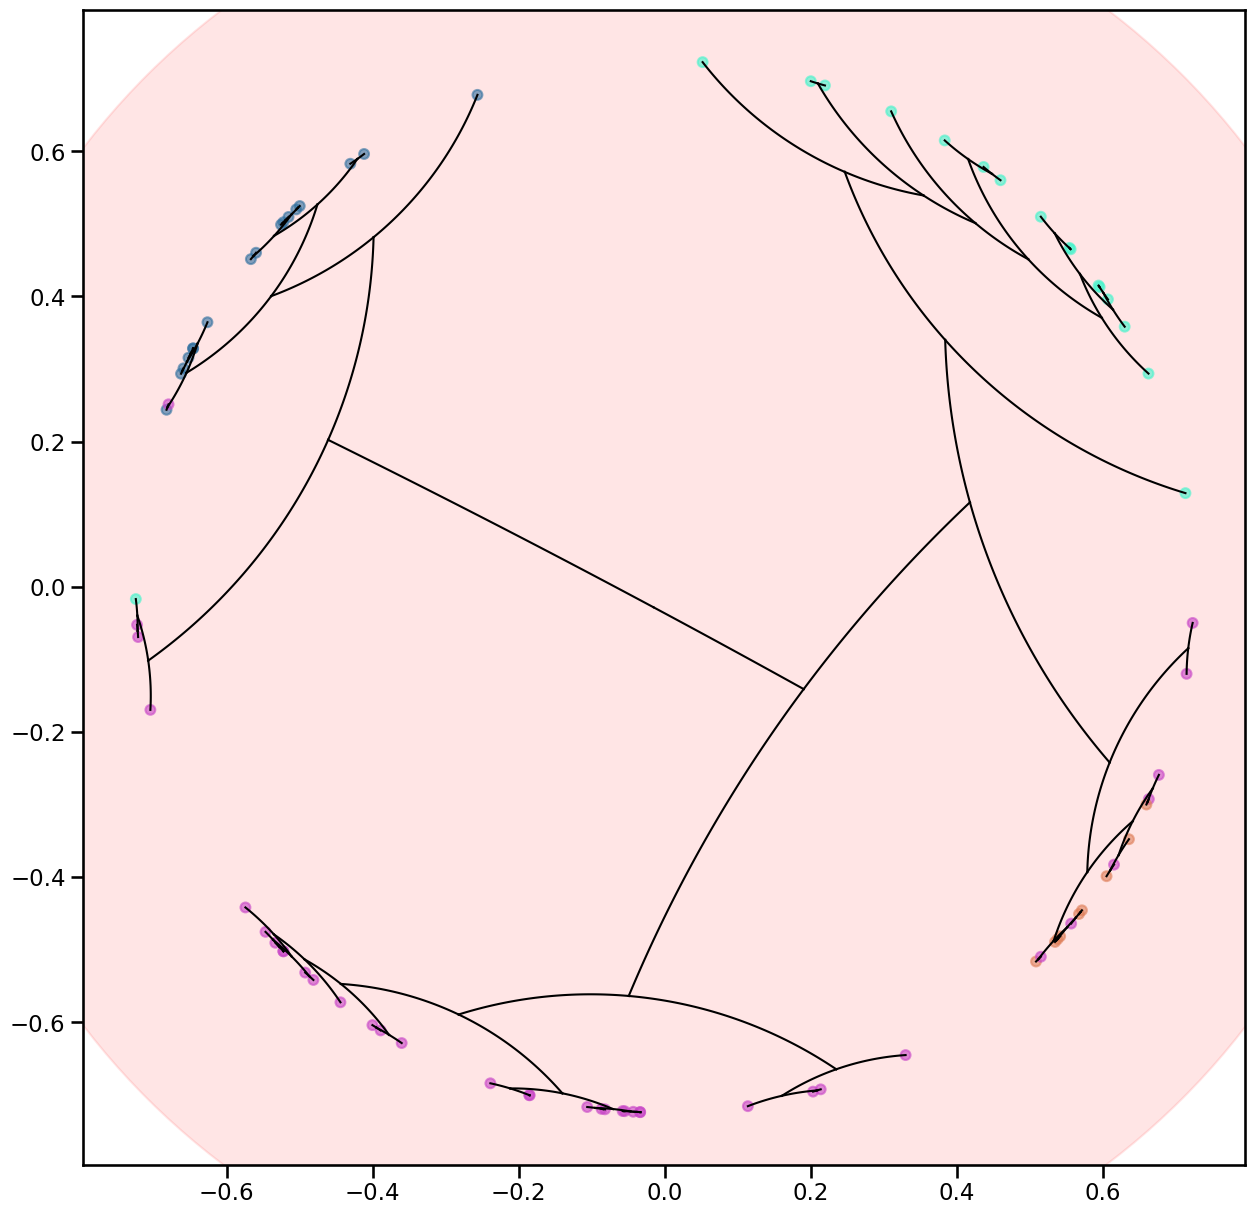

In [67]:
colors = get_colors(meta_list1, 1234)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
circle = plt.Circle((0, 0), 1.0, color='r', alpha=0.1)
ax.add_artist(circle)
ax.scatter(embeddings[:n, 0], embeddings[:n, 1], c=colors, s=50, alpha=0.6)
# ax.scatter(embeddings[n:,0],embeddings[n:,1],color ='black',s=20,alpha=0.6)
for n1, n2 in tree.edges():
    x1 = embeddings[n1];
    x2 = embeddings[n2]
    plot_geodesic(x1,x2,ax)

In [68]:

nodes1 = [node(name=str(i),son=[]) for i in range(len(uf.tree()))]
for i in range(n):
    nodes1[i].subson=[i];
for i,j in enumerate(uf.tree()):
    if(j!=-1):
        nodes1[j].son.append(nodes1[i])
    nodes1[i].value=torch.tensor(embeddings[i]);
    nodes1[i].hyper=torch.tensor(embeddings[i])
root = nodes1[-1];

In [69]:
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

{'CD4Tn': '#184e77', 'Th17': '#1a759f', 'Th2': '#168aad', 'Tfh': '#34a0a4', 'empty': '#fff'}


In [70]:
def rotate(nodes,embeddings,epoches2,n,similarities):
    deep_search_tree(root,0,[],root)
    result1 = []
    result2 = []

    distances = []
    for i in nodes:
        if(int(i)>=n):
            if(int(i.son[0]) <n and int(i.son[1])<n ):
                for i1,j1 in itertools.combinations(i.subson,2):
                    for j in i.rest(n):
                        result1.append([[i1,j1],j,int(i),1,int(j)])
                    
    for i in nodes[:-1]:
        if(int(i)>=n and len(i.son)>=2):
            for i1 in range(len(i.subson)):
                for i2 in range(i1+1,len(i.subson)):
                    for j in i.rest(n):
                        result2.append([[i.subson[i1],i.subson[i2]],j,int(i),0,int(i.f)])
            
    for i in nodes:
        distances.append(i.distance_to_root);
    distances = torch.tensor(distances)
    dataset_test1 = balance_dataset(similarities,len(result1),embeddings,distances,result1)
    dataloader1 = data.DataLoader(dataset_test1, batch_size=1, shuffle=True, pin_memory=True)
    
    dataset_test2 = balance_dataset(similarities,10000,embeddings,distances,result2)
    dataloader2 = data.DataLoader(dataset_test2, batch_size=1, shuffle=True, pin_memory=True)    
    
    model2 = balancehc(nodes1,torch.tensor(embeddings),hyperparamter = 1)
    
    Optimizer = getattr(optim, 'RAdam')
    optimizer = Optimizer(model2.parameters(),0.0005)
    train2(model2,dataloader1,dataloader2,optimizer,epoches2)
    temp = model2.embeddings.weight.data
    return temp

In [71]:
temp = rotate(nodes1,embeddings,10,n,similarities)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
root = nodes1[-1]

	 Epoch 0 | average train loss1: 0.000264
	 Epoch 0 | average train loss2: 0.460646


/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/model/balancehc.py:46: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



	 Epoch 1 | average train loss1: 0.000269


/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/model/balancehc.py:71: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/model/balancehc.py:92: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



	 Epoch 1 | average train loss2: 0.460367
	 Epoch 2 | average train loss1: 0.000266
	 Epoch 2 | average train loss2: 0.460157
	 Epoch 3 | average train loss1: 0.000261
	 Epoch 3 | average train loss2: 0.460203
	 Epoch 4 | average train loss1: 0.000260
	 Epoch 4 | average train loss2: 0.459870
	 Epoch 5 | average train loss1: 0.000260
	 Epoch 5 | average train loss2: 0.459747
	 Epoch 6 | average train loss1: 0.000261
	 Epoch 6 | average train loss2: 0.460078
	 Epoch 7 | average train loss1: 0.000261
	 Epoch 7 | average train loss2: 0.460003
	 Epoch 8 | average train loss1: 0.000259
	 Epoch 8 | average train loss2: 0.460066
	 Epoch 9 | average train loss1: 0.000261
	 Epoch 9 | average train loss2: 0.459765


In [75]:
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

{'CD4Tn': '#184e77', 'Th17': '#1a759f', 'Th2': '#168aad', 'Tfh': '#34a0a4', 'empty': '#fff'}


In [73]:
def merge_points(similarities,root,nodes,embeddings,epoches,c1,c2,n):
    root,_ = search_tree(root,c1,c2,n)
    print(_)
    if(_ == True):
        return embeddings,root
    nodes_merge = [];
    add_meta(root,[],nodes_merge)
    for i in nodes_merge:
        if(int(i)<n):
            i.subson = [int(i)]
        else:
            i.subson=[]
    result1 = []
    result2 = []

    distances = []
    for i in nodes:
        if(int(i)>=n):
            if(int(i.son[0]) <n and int(i.son[1])<n ):
                for i1,j1 in itertools.combinations(i.subson,2):
                    for j in i.rest(n):
                        result1.append([[i1,j1],j,int(i),1,int(j)])
                    
    for i in nodes[:-1]:
        if(int(i)>=n and len(i.son)>=2):
            for i1 in range(len(i.subson)):
                for i2 in range(i1+1,len(i.subson)):
                    for j in i.rest(n):
                        result2.append([[i.subson[i1],i.subson[i2]],j,int(i),0,int(i.f)])
            
    for i in nodes:
        distances.append(i.distance_to_root);
    distances = torch.tensor(distances)
    dataset_test1 = balance_dataset(similarities,len(result1),embeddings,distances,result1)
    dataloader1 = data.DataLoader(dataset_test1, batch_size=1, shuffle=True, pin_memory=True)
    
    dataset_test2 = balance_dataset(similarities,5000,embeddings,distances,result2)
    dataloader2 = data.DataLoader(dataset_test2, batch_size=1, shuffle=True, pin_memory=True)    
    
    model2 = balancehc(nodes1,torch.tensor(embeddings),hyperparamter = 1)
    
    Optimizer = getattr(optim, 'RAdam')
    optimizer = Optimizer(model2.parameters(),0.0005)
    train2(model2,dataloader1,dataloader2,optimizer,epoches)
    temp = model2.embeddings.weight.data
    return temp,nodes_merge[0]

In [74]:
merge_points(similarities,)

TypeError: merge_points() missing 7 required positional arguments: 'root', 'nodes', 'embeddings', 'epoches', 'c1', 'c2', and 'n'

In [80]:
temp,root = merge_points(similarities,root,nodes1,embeddings,0,10,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

144 61
120 4
125 56
117 53
133 79
118 2
123 48
137 25
127 63
135 9
146 70
124 64
130 40
False
{'CD4Tn': '#184e77', 'Th17': '#1a759f', 'Th2': '#168aad', 'Tfh': '#34a0a4', 'empty': '#fff'}


In [84]:
temp,root = merge_points(similarities,root,nodes1,embeddings,0,10,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

132 4
150 39
140 25
154 40
False
{'CD4Tn': '#184e77', 'Th17': '#1a759f', 'Th2': '#168aad', 'Tfh': '#34a0a4', 'empty': '#fff'}


In [90]:
temp,root = merge_points(similarities,root,nodes1,embeddings,0,11,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

156 4
False
{'CD4Tn': '#184e77', 'Th17': '#1a759f', 'Th2': '#168aad', 'Tfh': '#34a0a4', 'empty': '#fff'}


In [91]:
temp,root = merge_points(similarities,root,nodes1,embeddings,0,11,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

158 4
False
{'CD4Tn': '#184e77', 'Tfh': '#1a759f', 'Th2': '#168aad', 'Th17': '#34a0a4', 'empty': '#fff'}


In [48]:
temp,root = merge_points(similarities,root,nodes1,embeddings,0,1,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

112 56
101 18
115 47
107 60
104 21
False
{'CD4Tn': '#184e77', 'Th17': '#1a759f', 'Th2': '#168aad', 'Tfh': '#34a0a4', 'empty': '#fff'}


In [49]:
embeddings

array([[ 0.5394955228, -0.4836163598],
       [-0.3963078733, -0.6064502006],
       [ 0.5034241345, -0.5152922438],
       [-0.7187210852, -0.0584935101],
       [-0.3604043424, -0.6288076639],
       [-0.0355067865, -0.7154793093],
       [ 0.6625706553,  0.2937524617],
       [ 0.5415572524, -0.4816701114],
       [ 0.5676193635, -0.4465909742],
       [ 0.5150767565,  0.5098884702],
       [-0.5469122529, -0.4755810797],
       [ 0.5368868885, -0.4854316466],
       [-0.649928424 ,  0.3309901572],
       [-0.6524631977,  0.3155663908],
       [ 0.2041319939,  0.6912052226],
       [ 0.6606987903, -0.2952002591],
       [-0.491638386 ,  0.5193089025],
       [ 0.5890838023,  0.4110527547],
       [-0.043205034 , -0.7234803438],
       [ 0.5873692928,  0.4101834414],
       [ 0.2002224075, -0.6935958477],
       [-0.5011567946,  0.5206645237],
       [-0.4151184602,  0.5887882943],
       [ 0.4318082703,  0.5754370808],
       [-0.7165454894, -0.074186785 ],
       [ 0.452007503 ,  0

In [50]:
temp,root = merge_points(similarities,root,nodes1,embeddings,0,1,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

117 52
False
{'CD4Tn': '#184e77', 'Th17': '#1a759f', 'Th2': '#168aad', 'Tfh': '#34a0a4', 'empty': '#fff'}


/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/datasets/balance_dataset.py:54: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/model/balancehc.py:22: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



In [51]:
temp,root = merge_points(similarities,root,nodes1,embeddings,0,3,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

144 61
125 34
141 52
118 35
131 39
138 69
137 26
127 63
135 73
146 70
124 64
130 74
False
{'CD4Tn': '#184e77', 'Th17': '#1a759f', 'Th2': '#168aad', 'Tfh': '#34a0a4', 'empty': '#fff'}


In [52]:
temp,root = merge_points(similarities,root,nodes1,embeddings,0,3,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

148 31
126 51
134 35
136 73
128 77
143 22
False
{'CD4Tn': '#184e77', 'Th17': '#1a759f', 'Th2': '#168aad', 'Tfh': '#34a0a4', 'empty': '#fff'}


In [53]:
temp,root = merge_points(similarities,root,nodes1,embeddings,0,3,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

129 37
150 69
139 6
147 22
False
{'CD4Tn': '#184e77', 'Th17': '#1a759f', 'Th2': '#168aad', 'Tfh': '#34a0a4', 'empty': '#fff'}


In [54]:
temp,root = merge_points(similarities,root,nodes1,embeddings,0,3,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

132 37
140 26
154 22
False
{'CD4Tn': '#184e77', 'Th17': '#1a759f', 'Th2': '#168aad', 'Tfh': '#34a0a4', 'empty': '#fff'}


In [55]:
temp,root = merge_points(similarities,root,nodes1,embeddings,0,3,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

149 37
142 26
157 22
False
{'CD4Tn': '#184e77', 'Th17': '#1a759f', 'Th2': '#168aad', 'Tfh': '#34a0a4', 'empty': '#fff'}


In [56]:
temp,root = merge_points(similarities,root,nodes1,embeddings,0,3,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

151 37
145 26
False
{'CD4Tn': '#184e77', 'Th17': '#1a759f', 'Th2': '#168aad', 'Tfh': '#34a0a4', 'empty': '#fff'}


In [58]:
temp,root = merge_points(similarities,root,nodes1,embeddings,0,3,100,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

153 26
False
{'CD4Tn': '#184e77', 'Th17': '#1a759f', 'Th2': '#168aad', 'Tfh': '#34a0a4', 'empty': '#fff'}


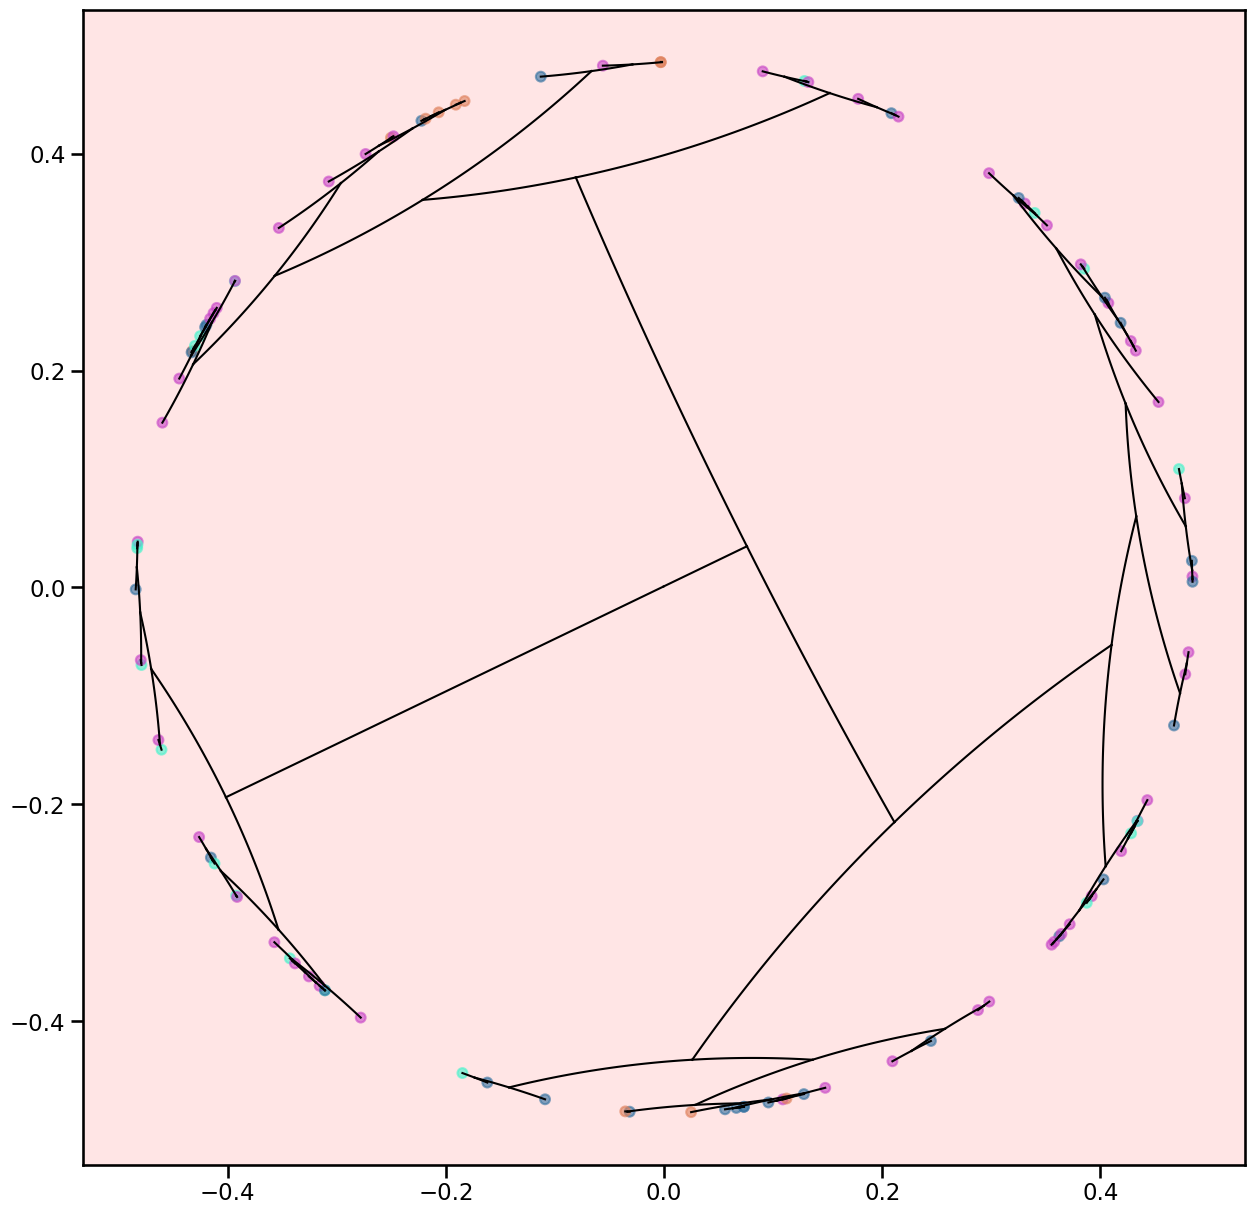

In [34]:
colors = get_colors(meta_list1, 1234)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
circle = plt.Circle((0, 0), 1.0, color='r', alpha=0.1)
ax.add_artist(circle)
ax.scatter(embeddings[:n, 0], embeddings[:n, 1], c=colors, s=50, alpha=0.6)
# ax.scatter(embeddings[n:,0],embeddings[n:,1],color ='black',s=20,alpha=0.6)
for n1, n2 in tree.edges():
    x1 = embeddings[n1];
    x2 = embeddings[n2]
    plot_geodesic(x1,x2,ax)

In [35]:

nodes1 = [node(name=str(i),son=[]) for i in range(len(uf.tree()))]
for i in range(n):
    nodes1[i].subson=[i];
for i,j in enumerate(uf.tree()):
    if(j!=-1):
        nodes1[j].son.append(nodes1[i])
    nodes1[i].value=torch.tensor(embeddings[i]);
    nodes1[i].hyper=torch.tensor(embeddings[i])
root = nodes1[-1];

In [36]:
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

{'Th2': '#184e77', 'Tfh': '#1a759f', 'empty': '#fff', 'Th17': '#34a0a4', 'CD4Tn': '#52b69a'}


In [59]:
subset = np.random.choice(np.arange(len(temp)), 5, replace=False)
temp = temp[subset]
temp

array([[0.1174433897, 0.3937823523],
       [0.4353322526, 0.5694786566],
       [0.6892356429, 0.9295459365],
       [0.8135289285, 0.6465523236],
       [0.4527298093, 0.5381478353]])

In [51]:
temp = np.random.random((10,2))
temp

array([[0.1174433897, 0.3937823523],
       [0.4527298093, 0.5381478353],
       [0.7906221026, 0.4658363429],
       [0.4353322526, 0.5694786566],
       [0.9692589998, 0.0405561488],
       [0.5481195726, 0.4625766032],
       [0.3764722289, 0.3279120842],
       [0.8135289285, 0.6465523236],
       [0.0474264775, 0.9949575676],
       [0.6892356429, 0.9295459365]])